Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [47]:
df = pd.read_csv('SalaryData.csv')

In [48]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [34]:
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [49]:
df.shape

(40, 3)

In [52]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [37]:
df.Education = pd.Categorical(df.Education)

In [38]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [39]:
df.Occupation = pd.Categorical(df.Occupation)

In [40]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

One Way ANOVA (Education)

Null Hypothesis 𝐻0: The mean salary is the same across all the 3 categories of education (Doctorate, Bachelors, HS-Grad).

Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of education.

One Way ANOVA (Occupation)

Null Hypothesis 𝐻0: The mean salary is the same across all the 4 categories of occupation (Prof-Specialty, Sales, Adm-clerical, Exec-Managerial).

Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of occupation.

1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [41]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


1.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


In [42]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


1.4 If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

Problem 1B:

1.5 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]


In [44]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


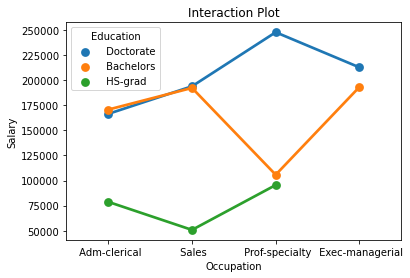

In [51]:
plt.title('Interaction Plot')
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None);

1.6 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

Null Hypothesis 𝐻0: The effect of the variable ‘Education’ on the mean ‘Salary’ does not depend on the effect of the other independent variable ‘Occupation’. There is no interaction effect between the 2 independent variables ‘Education’ and ‘Occupation’.

Alternate Hypothesis 𝐻1: There is an interaction between the two independent variables ‘Education’ and ‘Occupation’ on the mean ‘Salary’.

In [64]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


1.7 Explain the business implications of performing ANOVA for this particular case study.


Performing ANOVA for this case study gives us insights about the data. As explained in question 1.6, we can see that there is an interaction effect between ‘Education’ and ‘Occupation’ on the mean salary. This is also seen in the interaction plot shown in figure 1. It is seen that education along with occupation results in higher and better salaries among the people. It is clearly seen that people with Doctorate education earn the maximum salaries and people with education HS-grad earn the least. 
Hence we can conclude that education plays a very important role in the salary of a person. Therefore the business implication is that we have to encourage more people to study so that they get better jobs and thus better salaries. People having good jobs and earning well means people are able to afford a better lifestyle. Earning a higher salary means they are also able to pay better taxes which indirectly improves the standards to the city. Therefore education has to be promoted and more students should be encouraged to study.


In [ ]:
Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

df = pd.read_csv('SalaryData.csv')

df.head()

df.info()

df.describe()

df.shape

df.isnull().sum()

df.info()

df.Education = pd.Categorical(df.Education)

df.Education.value_counts()

df.Occupation = pd.Categorical(df.Occupation)

df.Occupation.value_counts()

1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

One Way ANOVA (Education)

Null Hypothesis 𝐻0: The mean salary is the same across all the 3 categories of education (Doctorate, Bachelors, HS-Grad).

Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of education.

One Way ANOVA (Occupation)

Null Hypothesis 𝐻0: The mean salary is the same across all the 4 categories of occupation (Prof-Specialty, Sales, Adm-clerical, Exec-Managerial).

Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of occupation.

1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

1.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.


formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

1.4 If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

Problem 1B:

1.5 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]


formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

plt.title('Interaction Plot')
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None);

1.6 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

Null Hypothesis 𝐻0: The effect of the variable ‘Education’ on the mean ‘Salary’ does not depend on the effect of the other independent variable ‘Occupation’. There is no interaction effect between the 2 independent variables ‘Education’ and ‘Occupation’.

Alternate Hypothesis 𝐻1: There is an interaction between the two independent variables ‘Education’ and ‘Occupation’ on the mean ‘Salary’.

formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

1.7 Explain the business implications of performing ANOVA for this particular case study.


Performing ANOVA for this case study gives us insights about the data. As explained in question 1.6, we can see that there is an interaction effect between ‘Education’ and ‘Occupation’ on the mean salary. This is also seen in the interaction plot shown in figure 1. It is seen that education along with occupation results in higher and better salaries among the people. It is clearly seen that people with Doctorate education earn the maximum salaries and people with education HS-grad earn the least. 
Hence we can conclude that education plays a very important role in the salary of a person. Therefore the business implication is that we have to encourage more people to study so that they get better jobs and thus better salaries. People having good jobs and earning well means people are able to afford a better lifestyle. Earning a higher salary means they are also able to pay better taxes which indirectly improves the standards to the city. Therefore education has to be promoted and more students should be encouraged to study.
